In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv("E:\IITH\Machine learning by IITH\ML class\ex1data1.txt", sep =",", header= None)

In [3]:
df.columns= ["Population", "Profit"]


In [4]:
df

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


# Two_feauture linear regression( Simple Linear regression)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


[Text(0.5, 0, 'Population'), Text(0, 0.5, 'Profit')]

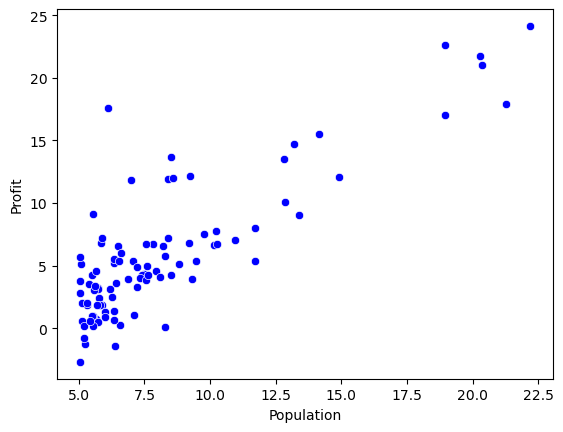

In [6]:
plot= sns.scatterplot(x="Population", y= "Profit" , data= df, color= "b")
plot.set(xlabel="Population", ylabel= "Profit")

In [7]:
m = df.shape[0]
X = np.hstack((np.ones((m,1)), df.Population.values.reshape(-1,1)))
y = np.array(df.Profit.values).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1],1))

iterations =2192
alpha = 0.01

In [8]:
print(theta.shape)

(2, 1)


In [9]:
y

array([[17.592  ],
       [ 9.1302 ],
       [13.662  ],
       [11.854  ],
       [ 6.8233 ],
       [11.886  ],
       [ 4.3483 ],
       [12.     ],
       [ 6.5987 ],
       [ 3.8166 ],
       [ 3.2522 ],
       [15.505  ],
       [ 3.1551 ],
       [ 7.2258 ],
       [ 0.71618],
       [ 3.5129 ],
       [ 5.3048 ],
       [ 0.56077],
       [ 3.6518 ],
       [ 5.3893 ],
       [ 3.1386 ],
       [21.767  ],
       [ 4.263  ],
       [ 5.1875 ],
       [ 3.0825 ],
       [22.638  ],
       [13.501  ],
       [ 7.0467 ],
       [14.692  ],
       [24.147  ],
       [-1.22   ],
       [ 5.9966 ],
       [12.134  ],
       [ 1.8495 ],
       [ 6.5426 ],
       [ 4.5623 ],
       [ 4.1164 ],
       [ 3.3928 ],
       [10.117  ],
       [ 5.4974 ],
       [ 0.55657],
       [ 3.9115 ],
       [ 5.3854 ],
       [ 2.4406 ],
       [ 6.7318 ],
       [ 1.0463 ],
       [ 5.1337 ],
       [ 1.844  ],
       [ 8.0043 ],
       [ 1.0179 ],
       [ 6.7504 ],
       [ 1.8396 ],
       [ 4.2

In [10]:
def compute_cost_one_variable(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    err= h-y
    J = (1/(2*m))* err.T.dot(err)
    return J

In [11]:
J = compute_cost_one_variable(X, y, theta)
print('With theta = [0 ; 0]\nCost computed =', J)


With theta = [0 ; 0]
Cost computed = [[32.07273388]]


In [12]:
print("cost computed with theta[-1;2] is :",compute_cost_one_variable(X, y, np.array([-1, 2]).reshape(-1, 1)))

cost computed with theta[-1;2] is : [[54.24245508]]


In [13]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))
    theta_history= []
    prev_cost= compute_cost_one_variable(X, y, theta)
    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        theta_history.append(theta)
        J_history[i] = compute_cost_one_variable(X, y, theta)
        if abs(prev_cost- J_history[i])<1e-4:
            print(i)
            break
        prev_cost= J_history[i]
    return theta, J_history, theta_history

In [14]:
theta_final, J_history, theta_hi= gradient_descent(X, y, theta, alpha, iterations)

1095


In [15]:
theta_final

array([[-3.34547133],
       [ 1.13774908]])

In [16]:
J_history

array([[6.73719046],
       [5.93159357],
       [5.90115471],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [17]:
theta_hi

[array([[0.05839135],
        [0.6532885 ]]),
 array([[0.06289175],
        [0.77000978]]),
 array([[0.05782293],
        [0.79134812]]),
 array([[0.05106363],
        [0.79572981]]),
 array([[0.04401438],
        [0.79709618]]),
 array([[0.03692413],
        [0.79792547]]),
 array([[0.02983712],
        [0.79865824]]),
 array([[0.02276118],
        [0.79937279]]),
 array([[0.0156977 ],
        [0.80008305]]),
 array([[0.0086469],
        [0.8007915]]),
 array([[0.00160879],
        [0.80149857]]),
 array([[-0.00541662],
        [ 0.80220436]]),
 array([[-0.01242938],
        [ 0.80290886]]),
 array([[-0.01942949],
        [ 0.8036121 ]]),
 array([[-0.02641699],
        [ 0.80431407]]),
 array([[-0.03339189],
        [ 0.80501478]]),
 array([[-0.04035421],
        [ 0.80571422]]),
 array([[-0.04730399],
        [ 0.8064124 ]]),
 array([[-0.05424124],
        [ 0.80710932]]),
 array([[-0.06116598],
        [ 0.80780498]]),
 array([[-0.06807824],
        [ 0.8084994 ]]),
 array([[-0.0749

[Text(0.5, 0, 'Population'),
 Text(0, 0.5, 'Profit_predicted'),
 Text(0.5, 1.0, 'Training data with linear regression fit')]

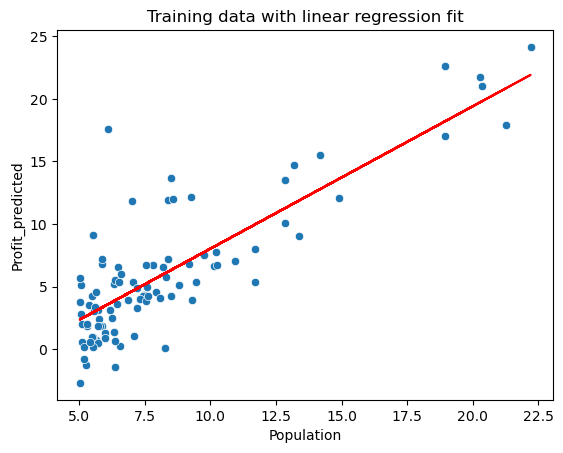

In [18]:
ax = sns.scatterplot(x='Population', y='Profit', data=df)
plt.plot(X[:,1], X.dot(theta_final), color='r')
ax.set(xlabel='Population', ylabel='Profit_predicted', title='Training data with linear regression fit')

In [19]:
theta_final

array([[-3.34547133],
       [ 1.13774908]])

In [20]:
theta_final[1, 0]

1.1377490810952493

In [21]:
np.array([1, 6.1101])@theta_final   # prediction atr population = 23

array([3.60628933])

# Visualizing J(theta)

In [22]:
theta0_vals= np.empty(shape= (len(theta_hi), 1))
for i in range(len(theta_hi)):
    theta0_vals[i]= theta_hi[i][0]

In [23]:
theta0_vals= theta0_vals.ravel()

In [24]:
theta0_vals

array([ 0.05839135,  0.06289175,  0.05782293, ..., -3.34348198,
       -3.34447755, -3.34547133])

In [25]:
theta1_vals= np.empty(shape= (len(theta_hi), 1))
for i in range(len(theta_hi)):
    theta1_vals[i]= theta_hi[i][1]

In [26]:
theta1_vals= theta1_vals.ravel()
theta1_vals

array([0.6532885 , 0.77000978, 0.79134812, ..., 1.13754923, 1.13764925,
       1.13774908])

In [27]:
J_vals= np.empty(shape= (len(theta0_vals), len(theta1_vals)))
for i in range(0, len(theta0_vals)):
    for j in range(0, len(theta1_vals)):
        J_vals[i,j] = compute_cost_one_variable(X, y, [[theta0_vals[i]], [theta1_vals[j]]])

In [28]:
J_vals

array([[ 6.73719046,  5.92932252,  5.90153908, ..., 10.62979346,
        10.63256917, 10.63534069],
       [ 6.73517523,  5.93159357,  5.90459373, ..., 10.64556143,
        10.64834082, 10.651116  ],
       [ 6.73744644,  5.92903712,  5.90115471, ..., 10.62780333,
        10.63057858, 10.63334963],
       ...,
       [14.05454137, 10.00665326,  9.38654744, ...,  4.5047415 ,
         4.50474091,  4.50474113],
       [14.05837673, 10.00954041,  9.38926124, ...,  4.50464288,
         4.50464147,  4.50464088],
       [14.06220615, 10.01242334,  9.39197114, ...,  4.50454542,
         4.50454321,  4.50454181]])

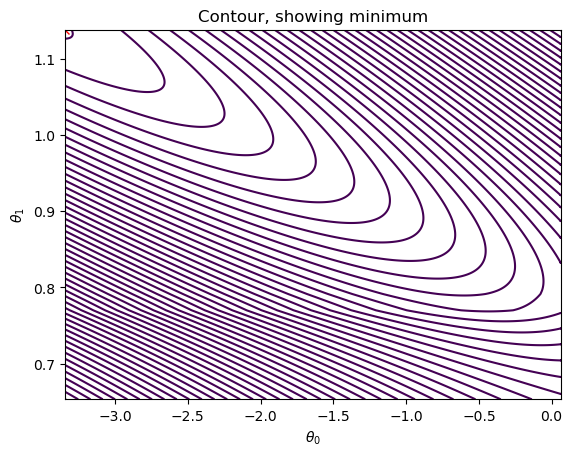

In [29]:
ax = plt.contour(theta0_vals, theta1_vals, np.transpose(J_vals), levels=np.logspace(-0.05,10,1000))
plt.plot(theta_final[0,0], theta_final[1,0], marker='x', color='r');
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'$\theta_1$');
plt.title('Contour, showing minimum');

# Same with Sk-learn

In [30]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(df.Population.values.reshape(-1,1), 
            df.Profit.values.reshape(-1,1))

LinearRegression()

In [31]:
lin_reg.intercept_, lin_reg.coef_

(array([-3.89578088]), array([[1.19303364]]))

# Same with Normal equations

In [32]:
def normal_eqn(X, y):
    inv = np.linalg.pinv(X.T.dot(X))
    theta = inv.dot(X.T).dot(y)
    return theta

In [33]:
Xe = np.hstack((np.ones((m,1)), X[:, 0:1].reshape(-1, 1)))
theta_e = normal_eqn(Xe, y)
theta_e

array([[2.91956753],
       [2.91956753]])

# Linear regression of multiple feautures by doing normalization also

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import r2_score

In [35]:
df= pd.read_csv("50_Startups.csv")

In [36]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [37]:
Data= df.to_numpy()

In [38]:
Data

array([[165349.2, 136897.8, 471784.1, 'New York', 192261.83],
       [162597.7, 151377.59, 443898.53, 'California', 191792.06],
       [153441.51, 101145.55, 407934.54, 'Florida', 191050.39],
       [144372.41, 118671.85, 383199.62, 'New York', 182901.99],
       [142107.34, 91391.77, 366168.42, 'Florida', 166187.94],
       [131876.9, 99814.71, 362861.36, 'New York', 156991.12],
       [134615.46, 147198.87, 127716.82, 'California', 156122.51],
       [130298.13, 145530.06, 323876.68, 'Florida', 155752.6],
       [120542.52, 148718.95, 311613.29, 'New York', 152211.77],
       [123334.88, 108679.17, 304981.62, 'California', 149759.96],
       [101913.08, 110594.11, 229160.95, 'Florida', 146121.95],
       [100671.96, 91790.61, 249744.55, 'California', 144259.4],
       [93863.75, 127320.38, 249839.44, 'Florida', 141585.52],
       [91992.39, 135495.07, 252664.93, 'California', 134307.35],
       [119943.24, 156547.42, 256512.92, 'Florida', 132602.65],
       [114523.61, 122616.84, 261

In [39]:
X= Data[:, 0:4]
y= Data[:, 4] 

In [40]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

# Normalize data


In [41]:
X = np.insert(X,0,np.ones((1,50)),axis=1)
print(X)

[[1.0 165349.2 136897.8 471784.1 'New York']
 [1.0 162597.7 151377.59 443898.53 'California']
 [1.0 153441.51 101145.55 407934.54 'Florida']
 [1.0 144372.41 118671.85 383199.62 'New York']
 [1.0 142107.34 91391.77 366168.42 'Florida']
 [1.0 131876.9 99814.71 362861.36 'New York']
 [1.0 134615.46 147198.87 127716.82 'California']
 [1.0 130298.13 145530.06 323876.68 'Florida']
 [1.0 120542.52 148718.95 311613.29 'New York']
 [1.0 123334.88 108679.17 304981.62 'California']
 [1.0 101913.08 110594.11 229160.95 'Florida']
 [1.0 100671.96 91790.61 249744.55 'California']
 [1.0 93863.75 127320.38 249839.44 'Florida']
 [1.0 91992.39 135495.07 252664.93 'California']
 [1.0 119943.24 156547.42 256512.92 'Florida']
 [1.0 114523.61 122616.84 261776.23 'New York']
 [1.0 78013.11 121597.55 264346.06 'California']
 [1.0 94657.16 145077.58 282574.31 'New York']
 [1.0 91749.16 114175.79 294919.57 'Florida']
 [1.0 86419.7 153514.11 0.0 'New York']
 [1.0 76253.86 113867.3 298664.47 'California']
 [1.0 78

In [42]:
def normalize(X):
    cols= X.shape[1]-2
    Xn_without_cat = X[:, 1:4]
    Xmean = np.mean(Xn_without_cat,axis=0)
    Xrange = np.max(Xn_without_cat,axis=0)-np.min(Xn_without_cat,axis=0)
    for i in range(0,cols):
        Xn_without_cat[:,i] = (X[:,i+1]-np.mean(X[:,i+1]))/(max(X[:,i+1])-min(X[:,i+1]))
    return Xn_without_cat, Xmean, Xrange

In [43]:
Xn_without_cat, Xmean, Xrange = normalize(X)
print(Xn_without_cat)

[[0.5541459190609934 0.11839885714651145 0.5527083303570425]
 [0.5375053789192812 0.22862665288900774 0.4936016966235191]
 [0.48213051166863835 -0.15376611971673446 0.4173719338994255]
 [0.4272823479037093 -0.020346683625346928 0.36494346079064544]
 [0.41358364237625583 -0.2280170356179488 0.3288438974522455]
 [0.35171191877553687 -0.1638971754631191 0.32183420806254376]
 [0.3682742002985197 0.1968160330785627 -0.17658135956680193]
 [0.3421638229879553 0.18411217150232198 0.23920174969864383]
 [0.283163779443747 0.20838768347903505 0.21320810133279172]
 [0.3000514329673201 -0.09641623228317471 0.1991515233345082]
 [0.17049652734939152 -0.08183869937840633 0.03844099917737789]
 [0.16299047349488244 -0.22498085525525455 0.08207027790889931]
 [0.12181573542539068 0.045490486548588664 0.08227140804448467]
 [0.11049811187474755 0.10772053681715103 0.08826035510734666]
 [0.27953944984311996 0.26798212456804665 0.09641660708786068]
 [0.2467625752044764 0.009684660194293355 0.10757279060485499

In [44]:
m= y.shape[0]
Xn_final= np.hstack((np.ones((m,1)),Xn_without_cat))

In [45]:
Xn_finall= np.hstack((Xn_final, X[:, 4].reshape(-1, 1)))

In [46]:
Xn_finall

array([[1.0, 0.5541459190609934, 0.11839885714651145, 0.5527083303570425,
        'New York'],
       [1.0, 0.5375053789192812, 0.22862665288900774, 0.4936016966235191,
        'California'],
       [1.0, 0.48213051166863835, -0.15376611971673446,
        0.4173719338994255, 'Florida'],
       [1.0, 0.4272823479037093, -0.020346683625346928,
        0.36494346079064544, 'New York'],
       [1.0, 0.41358364237625583, -0.2280170356179488,
        0.3288438974522455, 'Florida'],
       [1.0, 0.35171191877553687, -0.1638971754631191,
        0.32183420806254376, 'New York'],
       [1.0, 0.3682742002985197, 0.1968160330785627,
        -0.17658135956680193, 'California'],
       [1.0, 0.3421638229879553, 0.18411217150232198,
        0.23920174969864383, 'Florida'],
       [1.0, 0.283163779443747, 0.20838768347903505, 0.21320810133279172,
        'New York'],
       [1.0, 0.3000514329673201, -0.09641623228317471,
        0.1991515233345082, 'California'],
       [1.0, 0.17049652734939152, -0

In [47]:
y= y.reshape(-1, 1)
y

array([[192261.83],
       [191792.06],
       [191050.39],
       [182901.99],
       [166187.94],
       [156991.12],
       [156122.51],
       [155752.6],
       [152211.77],
       [149759.96],
       [146121.95],
       [144259.4],
       [141585.52],
       [134307.35],
       [132602.65],
       [129917.04],
       [126992.93],
       [125370.37],
       [124266.9],
       [122776.86],
       [118474.03],
       [111313.02],
       [110352.25],
       [108733.99],
       [108552.04],
       [107404.34],
       [105733.54],
       [105008.31],
       [103282.38],
       [101004.64],
       [99937.59],
       [97483.56],
       [97427.84],
       [96778.92],
       [96712.8],
       [96479.51],
       [90708.19],
       [89949.14],
       [81229.06],
       [81005.76],
       [78239.91],
       [77798.83],
       [71498.49],
       [69758.98],
       [65200.33],
       [64926.08],
       [49490.75],
       [42559.73],
       [35673.41],
       [14681.4]], dtype=object)

In [48]:
from sklearn.preprocessing import LabelEncoder
Label = LabelEncoder()
Xn_finall[:,4]= Label.fit_transform(Xn_finall[:,4])       # encoder used to given sequence number to a particular categorial
print (Xn_finall)

[[1.0 0.5541459190609934 0.11839885714651145 0.5527083303570425 2]
 [1.0 0.5375053789192812 0.22862665288900774 0.4936016966235191 0]
 [1.0 0.48213051166863835 -0.15376611971673446 0.4173719338994255 1]
 [1.0 0.4272823479037093 -0.020346683625346928 0.36494346079064544 2]
 [1.0 0.41358364237625583 -0.2280170356179488 0.3288438974522455 1]
 [1.0 0.35171191877553687 -0.1638971754631191 0.32183420806254376 2]
 [1.0 0.3682742002985197 0.1968160330785627 -0.17658135956680193 0]
 [1.0 0.3421638229879553 0.18411217150232198 0.23920174969864383 1]
 [1.0 0.283163779443747 0.20838768347903505 0.21320810133279172 2]
 [1.0 0.3000514329673201 -0.09641623228317471 0.1991515233345082 0]
 [1.0 0.17049652734939152 -0.08183869937840633 0.03844099917737789 1]
 [1.0 0.16299047349488244 -0.22498085525525455 0.08207027790889931 0]
 [1.0 0.12181573542539068 0.045490486548588664 0.08227140804448467 1]
 [1.0 0.11049811187474755 0.10772053681715103 0.08826035510734666 0]
 [1.0 0.27953944984311996 0.267982124568

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [4])], remainder="passthrough")
Xn_finall= np.array(ct.fit_transform(Xn_finall))
print(Xn_finall)

[[0.0 0.0 1.0 1.0 0.5541459190609934 0.11839885714651145
  0.5527083303570425]
 [1.0 0.0 0.0 1.0 0.5375053789192812 0.22862665288900774
  0.4936016966235191]
 [0.0 1.0 0.0 1.0 0.48213051166863835 -0.15376611971673446
  0.4173719338994255]
 [0.0 0.0 1.0 1.0 0.4272823479037093 -0.020346683625346928
  0.36494346079064544]
 [0.0 1.0 0.0 1.0 0.41358364237625583 -0.2280170356179488
  0.3288438974522455]
 [0.0 0.0 1.0 1.0 0.35171191877553687 -0.1638971754631191
  0.32183420806254376]
 [1.0 0.0 0.0 1.0 0.3682742002985197 0.1968160330785627
  -0.17658135956680193]
 [0.0 1.0 0.0 1.0 0.3421638229879553 0.18411217150232198
  0.23920174969864383]
 [0.0 0.0 1.0 1.0 0.283163779443747 0.20838768347903505
  0.21320810133279172]
 [1.0 0.0 0.0 1.0 0.3000514329673201 -0.09641623228317471
  0.1991515233345082]
 [0.0 1.0 0.0 1.0 0.17049652734939152 -0.08183869937840633
  0.03844099917737789]
 [1.0 0.0 0.0 1.0 0.16299047349488244 -0.22498085525525455
  0.08207027790889931]
 [0.0 1.0 0.0 1.0 0.121815735425390

In [50]:
import sklearn
from sklearn.model_selection import train_test_split
Xn_train, Xn_test, y_train, y_test= sklearn.model_selection.train_test_split(Xn_finall,y, test_size=0.5)

In [51]:
Xn_train

array([[0.0, 0.0, 1.0, 1.0, 0.35171191877553687, -0.1638971754631191,
        0.32183420806254376],
       [0.0, 0.0, 1.0, 1.0, 0.07679555994223139, 0.2448909695786667,
        -0.4472916696429576],
       [0.0, 1.0, 0.0, 1.0, 0.17049652734939152, -0.08183869937840633,
        0.03844099917737789],
       [0.0, 0.0, 1.0, 1.0, 0.4272823479037093, -0.020346683625346928,
        0.36494346079064544],
       [1.0, 0.0, 0.0, 1.0, 0.16299047349488244, -0.22498085525525455,
        0.08207027790889931],
       [1.0, 0.0, 0.0, 1.0, 0.11049811187474755, 0.10772053681715103,
        0.08826035510734666],
       [0.0, 1.0, 0.0, 1.0, -0.11023739818517411, -0.13921142439367323,
        0.007651195112340478],
       [1.0, 0.0, 0.0, 1.0, -0.2719534512413727, -0.02130433955160044,
        -0.08103161552074357],
       [0.0, 0.0, 1.0, 1.0, -0.4425758673159591, -0.5298432352266345,
        -0.4472916696429576],
       [1.0, 0.0, 0.0, 1.0, -0.4458540809390066, -0.033197010225602945,
        -0.3515422367

In [52]:
Xn_test

array([[0.0, 1.0, 0.0, 1.0, -0.046387255577892035, 0.46665492611966236,
        -0.19686313676107367],
       [0.0, 0.0, 1.0, 1.0, -0.3235094309497717, -0.4217089605992335,
        -0.05460124196639955],
       [0.0, 0.0, 1.0, 1.0, 0.02009319912040702, -0.1679574691148348,
        -0.14932738894761408],
       [1.0, 0.0, 0.0, 1.0, 0.015314524654488865, -0.0569214513557222,
        0.18576160620928076],
       [1.0, 0.0, 0.0, 1.0, 0.3000514329673201, -0.09641623228317471,
        0.1991515233345082],
       [0.0, 0.0, 1.0, 1.0, 0.1266141257411588, 0.18066765517870362,
        0.15165668406374855],
       [0.0, 0.0, 1.0, 1.0, -0.0761130722132311, 0.23870815108308804,
        -0.26030310856173416],
       [1.0, 0.0, 0.0, 1.0, -0.16507818362592616, 0.2767098870437989,
        -0.0004820590604898174],
       [1.0, 0.0, 0.0, 1.0, 0.025954128595723536, 0.0019252873081970598,
        0.11301983725182758],
       [0.0, 1.0, 0.0, 1.0, 0.12181573542539068, 0.045490486548588664,
        0.08227140

In [53]:
y_train

array([[156991.12],
       [122776.86],
       [146121.95],
       [182901.99],
       [144259.4],
       [134307.35],
       [96778.92],
       [78239.91],
       [35673.41],
       [14681.4],
       [129917.04],
       [108733.99],
       [99937.59],
       [124266.9],
       [101004.64],
       [42559.73],
       [69758.98],
       [192261.83],
       [71498.49],
       [155752.6],
       [166187.94],
       [156122.51],
       [111313.02],
       [97427.84],
       [49490.75]], dtype=object)

In [54]:
y_test

array([[103282.38],
       [81229.06],
       [108552.04],
       [118474.03],
       [149759.96],
       [125370.37],
       [97483.56],
       [96712.8],
       [126992.93],
       [141585.52],
       [132602.65],
       [65200.33],
       [107404.34],
       [191050.39],
       [105008.31],
       [89949.14],
       [105733.54],
       [110352.25],
       [64926.08],
       [90708.19],
       [77798.83],
       [81005.76],
       [152211.77],
       [191792.06],
       [96479.51]], dtype=object)

In [55]:
theta= np.zeros(shape= [Xn_train.shape[1], 1])
def compute_cost(Xn_train, y_train, theta):
    m = y_train.shape[0]
    h = Xn_train.dot(theta)
    J = (1/(2*m)) * ((h-y_train).T.dot(h-y_train))
    return J

In [56]:
def gradient_descent(Xn_train, y_train, theta, alpha, num_iters):
    m = y_train.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = Xn_train.dot(theta)
        diff_hy = h - y_train

        delta = (1/m) * (diff_hy.T.dot(Xn_train))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost(Xn_train, y_train, theta)

    return theta, J_history

In [57]:
alpha = [0.3, 0.1, 0.03, 0.01]
colors = ['b','r','g','c']
num_iters = 50

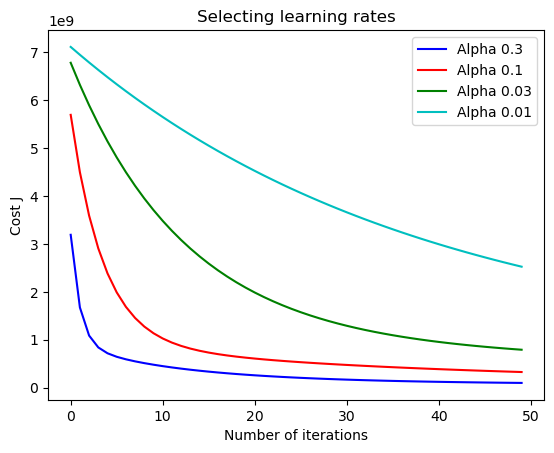

In [58]:
for i in range(0, len(alpha)):
    theta = np.zeros(shape=(Xn_train.shape[1],1))
    theta, J_history = gradient_descent(Xn_train, y_train, theta, alpha[i], num_iters)
    plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.title('Selecting learning rates');
plt.legend()
plt.show()

In [59]:
iterations = 250
alpha = 0.1
theta_final, J_history = gradient_descent(Xn_train, y_train, theta, alpha, iterations)

print('Theta found by gradient descent:')
print(theta_final)

Theta found by gradient descent:
[[27833.734892339653]
 [26331.683859484652]
 [29019.5829609794]
 [83185.0017128037]
 [108328.85795300573]
 [13496.884848631906]
 [40922.903332493355]]


In [60]:
Y_predicted= Xn_test@theta_final

In [61]:
Y_predicted

array([[102733.7838384402],
       [69232.97885429843],
       [106003.4450642117],
       [119511.38355048318],
       [150371.5054189279],
       [134565.23067552765],
       [96528.79996440803],
       [96850.99972556531],
       [118481.40297069347],
       [126693.60980871352],
       [147361.44629489523],
       [64840.98003447626],
       [100618.4350208603],
       [176750.04097887455],
       [124148.00227025268],
       [83179.89624897811],
       [106234.5158641288],
       [117848.92906984998],
       [46710.24872687664],
       [79725.19530230422],
       [71689.80040635701],
       [80915.07778067935],
       [154417.072602917],
       [192531.44257011675],
       [89844.8067895572]], dtype=object)

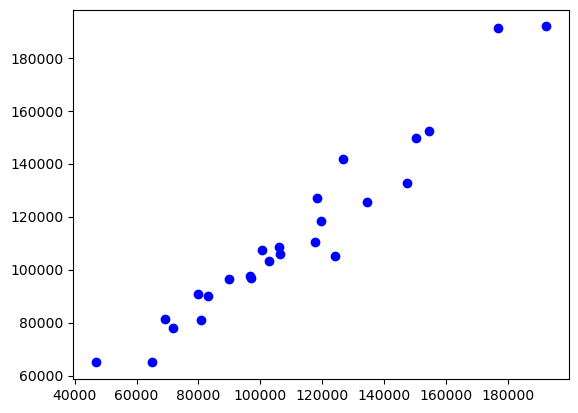

In [62]:
plt.scatter(Y_predicted, y_test, color= "b")

In [63]:
from sklearn.metrics import r2_score
r2_score(Y_predicted, y_test)    # Accuracy of model is 83.15%

0.9334112383143625

# Same by using SKlearn 

In [64]:
from sklearn.model_selection import train_test_split
Xn_train,Xn_test, y_train,y_test =train_test_split (Xn_finall ,y, test_size = 0.2,random_state= 42)
print ('Xn_Train Shape-',Xn_train.shape)
print ('y_Train Shape-',y_train.shape)
print ('Xn_Test Shape-',Xn_test.shape)
print ('y_Test Shape-',y_test.shape)

Xn_Train Shape- (40, 7)
y_Train Shape- (40, 1)
Xn_Test Shape- (10, 7)
y_Test Shape- (10, 1)


In [65]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(Xn_train,y_train)
print (lr)


LinearRegression()


In [66]:
y_pred= lr.predict(Xn_test)
print (y_pred)

[[126362.87908252]
 [ 84608.45383643]
 [ 99677.49425155]
 [ 46357.46068582]
 [128750.48288497]
 [ 50912.41741905]
 [109741.350327  ]
 [100643.24281644]
 [ 97599.275746  ]
 [113097.42524437]]


In [67]:
result = pd.concat([pd.DataFrame(y_pred, columns = ['Prediction']),
                    pd.DataFrame(y_test,columns = ['Y_Test'])], axis =1)
result['Difference']= y_test -y_pred
print (result)

      Prediction     Y_Test    Difference
0  126362.879083  134307.35   7944.470917
1   84608.453836   81005.76  -3602.693836
2   99677.494252   99937.59    260.095748
3   46357.460686   64926.08  18568.619314
4  128750.482885  125370.37  -3380.112885
5   50912.417419   35673.41 -15239.007419
6  109741.350327  105733.54  -4007.810327
7  100643.242816  107404.34   6761.097184
8   97599.275746   97427.84   -171.435746
9  113097.425244  122776.86   9679.434756


In [68]:
r2_score(y_pred, y_test)

0.8851366465077515

In [69]:
y_pre= pd.DataFrame(y_pred, columns =['Prediction'])
y_te = pd.DataFrame(y_test,columns= ['Actual'])
x_te = pd.DataFrame(Xn_test[:, 1:],columns= ['CF','FR','New Y','R&D','Admin','Mark'])
result = pd.concat([x_te,y_te,y_pre], axis =1)
result['Difference'] = y_pre ['Prediction']-y_te['Actual']
display (result)

,CF,FR,New Y,R&D,Admin,Mark,Actual,Prediction,Difference
0,0.0,0.0,1.0,0.110498,0.107721,0.08826,134307.35,126362.879083,-7944.470917
1,0.0,0.0,1.0,-0.21266,-0.292036,-0.076361,81005.76,84608.453836,3602.693836
2,1.0,0.0,1.0,-0.070923,-0.043417,-0.254129,99937.59,99677.494252,-260.095748
3,0.0,1.0,1.0,-0.439805,0.021379,-0.443256,64926.08,46357.460686,-18568.619314
4,0.0,1.0,1.0,0.126614,0.180668,0.151657,125370.37,128750.482885,3380.112885
5,0.0,1.0,1.0,-0.442576,-0.529843,-0.447292,35673.41,50912.417419,15239.007419
6,1.0,0.0,1.0,0.00972,0.1735,-0.163157,105733.54,109741.350327,4007.810327
7,0.0,0.0,1.0,-0.054774,0.138613,-0.154864,107404.34,100643.242816,-6761.097184
8,0.0,0.0,1.0,-0.06237,0.059948,-0.349609,97427.84,97599.275746,171.435746
9,0.0,1.0,1.0,0.076796,0.244891,-0.447292,122776.86,113097.425244,-9679.434756


In [70]:
print (lr.coef_)

[[  -315.26025537    623.53275078   -308.2724954       0.
  133210.28653155  -9036.14268303  14085.32326907]]


In [71]:
print (lr.intercept_)

[111688.8567009]


In [72]:
y_fpred= lr.predict(Xn_finall)
print (y_fpred)

[[191913.7274038 ]
 [187861.47839007]
 [183805.40426665]
 [173623.19035616]
 [174098.25202606]
 [164246.36680458]
 [156165.84489947]
 [159597.70047229]
 [150220.99659011]
 [155019.87822287]
 [136305.2407773 ]
 [136274.54962586]
 [129287.25932268]
 [126362.87908252]
 [148486.45402739]
 [145679.58311302]
 [116405.47712513]
 [128750.48288497]
 [129833.75780392]
 [113097.42524437]
 [116544.51129346]
 [115558.98201737]
 [115188.84018874]
 [111197.68506734]
 [113471.56812701]
 [100643.24281644]
 [109741.350327  ]
 [113876.00520371]
 [ 99143.48842753]
 [ 99560.68684705]
 [ 99677.49425155]
 [ 95418.08570235]
 [ 97599.275746  ]
 [ 98993.33790342]
 [ 86876.30432577]
 [ 91390.89209802]
 [ 75324.0220735 ]
 [ 91886.85822604]
 [ 71327.34640771]
 [ 84608.45383643]
 [ 74197.75183475]
 [ 76521.47893717]
 [ 70875.84128325]
 [ 58825.43932911]
 [ 62092.25276442]
 [ 46357.46068582]
 [ 56930.33870602]
 [ 44712.3085635 ]
 [ 50912.41741905]
 [ 47329.63344539]]


In [73]:
y_fpred= pd.DataFrame(y_fpred, columns =['Prediction'])
result = pd.concat([df ,y_fpred], axis =1)
result['Difference'] = result['Profit'] - result ['Prediction']     #entire prediction
display (result)

,R&D Spend,Administration,Marketing Spend,State,Profit,Prediction,Difference
0,165349.20,136897.80,471784.10,New York,192261.83,191913.727404,348.102596
1,162597.70,151377.59,443898.53,California,191792.06,187861.478390,3930.581610
2,153441.51,101145.55,407934.54,Florida,191050.39,183805.404267,7244.985733
3,144372.41,118671.85,383199.62,New York,182901.99,173623.190356,9278.799644
4,142107.34,91391.77,366168.42,Florida,166187.94,174098.252026,-7910.312026
5,131876.90,99814.71,362861.36,New York,156991.12,164246.366805,-7255.246805
6,134615.46,147198.87,127716.82,California,156122.51,156165.844899,-43.334899
7,130298.13,145530.06,323876.68,Florida,155752.60,159597.700472,-3845.100472
8,120542.52,148718.95,311613.29,New York,152211.77,150220.996590,1990.773410
9,123334.88,108679.17,304981.62,California,149759.96,155019.878223,-5259.918223


# Same by Normal Equations

In [91]:
def normal_eqn(X, y):
    inv = np.linalg.pinv(X.T.dot(X))
    theta = inv.dot(X.T).dot(y)
    return theta

In [92]:
Xn_finall= Xn_finall.astype("float64")

In [93]:
theta_e = normal_eqn(Xn_finall, y)
theta_e

array([[27951.591649765032],
       [28150.38044262788],
       [27909.704630631466],
       [84011.67672302434],
       [133275.27703480943],
       [-3547.352769911442],
       [12728.6694562679]], dtype=object)

In [94]:
y_pred= Xn_test@(theta_e.reshape(-1, 1))
print(y_pred)

[[127431.2489863193]
 [83684.97603991212]
 [99629.0105373089]
 [47588.36470993764]
 [130085.40993357847]
 [49123.07308287294]
 [110765.30116879061]
 [102200.26891866703]
 [98988.23660304339]
 [115594.18840731143]]


In [95]:
r2_score(y_pred, y_test)

0.911401738620105